# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Reading & Understanding The Data
-------

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# code to view all columns at a time

pd.set_option("display.max_columns", 40)

In [3]:
# Importing dataset

leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking shape

leads.shape

(9240, 37)

In [5]:
# checking info

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# describe

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# EDA
-----

In [7]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# dropping leads And Prospect ID column

leads.drop(["Prospect ID", "Lead Number"], 1, inplace = True)

In [9]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# handling Select Values (conerting them to NaN)

leads = leads.replace("Select", np.nan)

In [11]:
# Checking sum of missing values

leads.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
# checking missing values percentage

round(leads.isna().mean()*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
# dropping columns that have more than 45% missing values

col = leads.columns

for i in col:
    if (round(leads[i].isna().mean()*100, 2) >= 45):
        leads.drop(i, 1, inplace = True)

In [14]:
# checking shape after dropping columns

leads.shape

(9240, 28)

In [15]:
# creating a list to drop columns

columns_to_drop = ["Country", 'What matters most to you in choosing a course', 'Do Not Call', 'Search', 'Magazine',
                  'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                  'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                  'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [16]:
leads["Country"].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

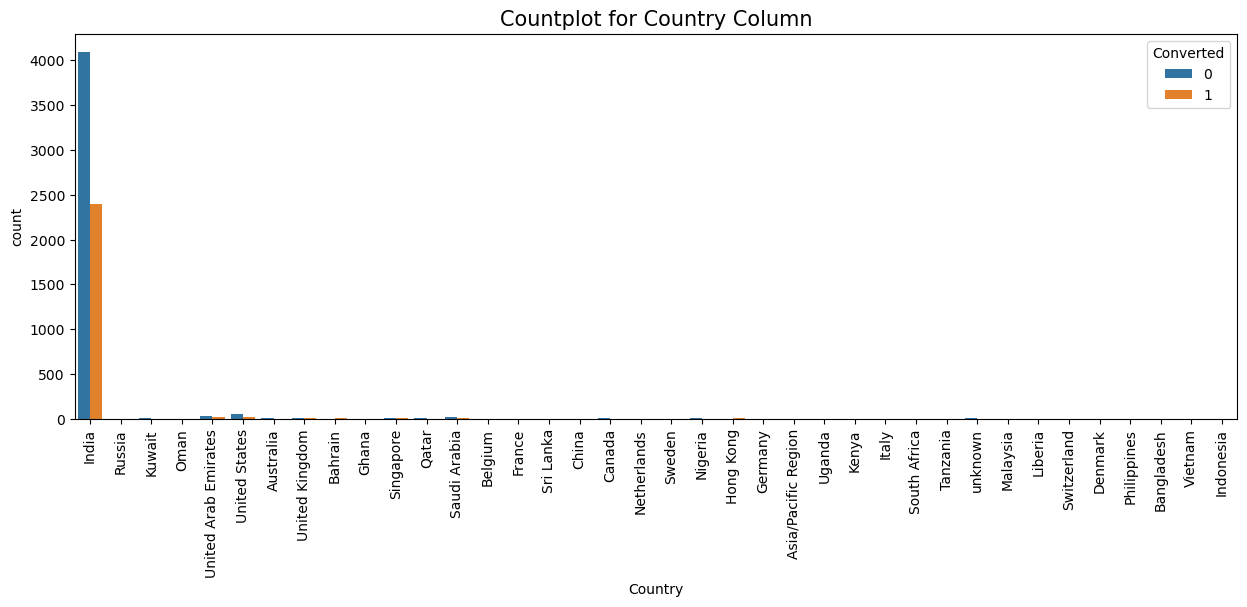

In [17]:
plt.figure(figsize=(15,5))


sns.countplot(x = leads["Country"], hue = leads["Converted"])
plt.title("Countplot for Country Column", size = 15)
plt.xticks(rotation = 90);

In [18]:
#checking value counts for city colun

leads["City"].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
# checking mode for city 

leads["City"].mode()

0    Mumbai
Name: City, dtype: object

In [20]:
# replacing NaN of city columns with the mode ("Mumbai")

leads["City"] = leads["City"].replace(np.nan, "Mumbai")

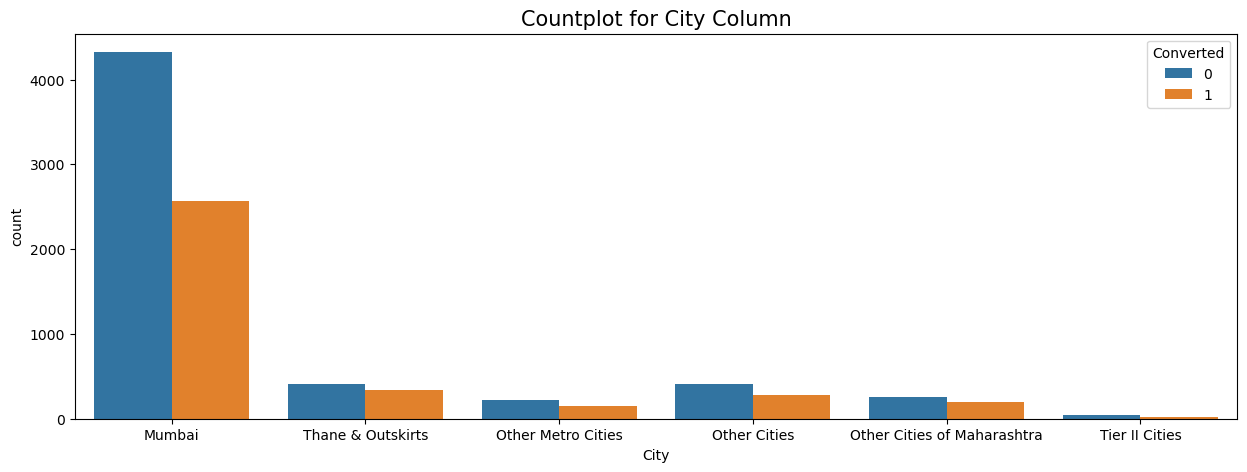

In [21]:
plt.figure(figsize = [15,5])

plt.title("Countplot for City Column", size = 15)
sns.countplot(x = leads["City"], hue = leads["Converted"]);

In [22]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened


In [23]:
# checking value counts for "Specialization" Column

leads["Specialization"].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### I've replaced "NaN" with "Not Known" because it may be students who don't have specialization 

In [24]:
# Replacing NaN values with "Finance Management"

leads["Specialization"] = leads["Specialization"].replace(np.nan, "Not Known")

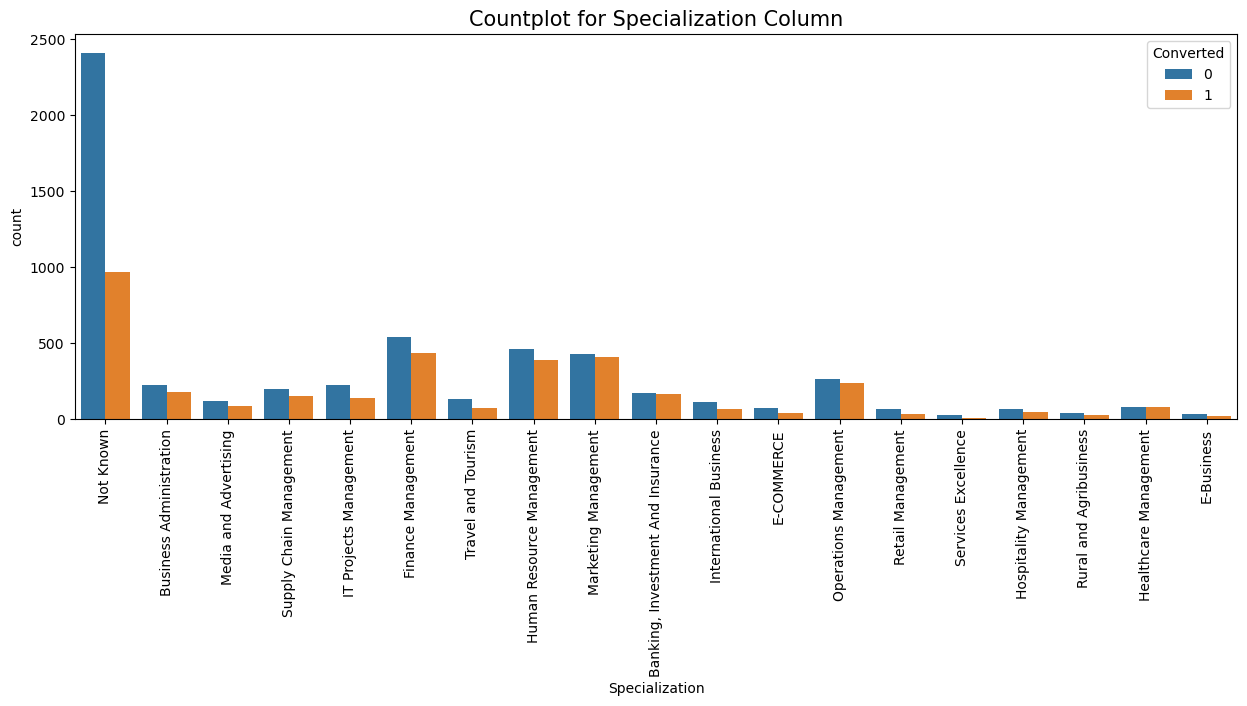

In [25]:
# plotting countplot for specialization column

plt.figure(figsize = [15,5])
plt.title("Countplot for Specialization Column", size = 15)
sns.countplot(x = leads["Specialization"], hue = leads["Converted"])
plt.xticks(rotation = 90);

In [26]:
# Merging all Management types into the "Management Specialization"

leads["Specialization"] = leads["Specialization"].replace(["Supply Chain Management", "IT Projects Management", "Finance Management", "Human Resource Management", "Marketing Management", "Operations Management", "Retail Management", "Hospitality Management", "Healthcare Management"], "Management Specializations")

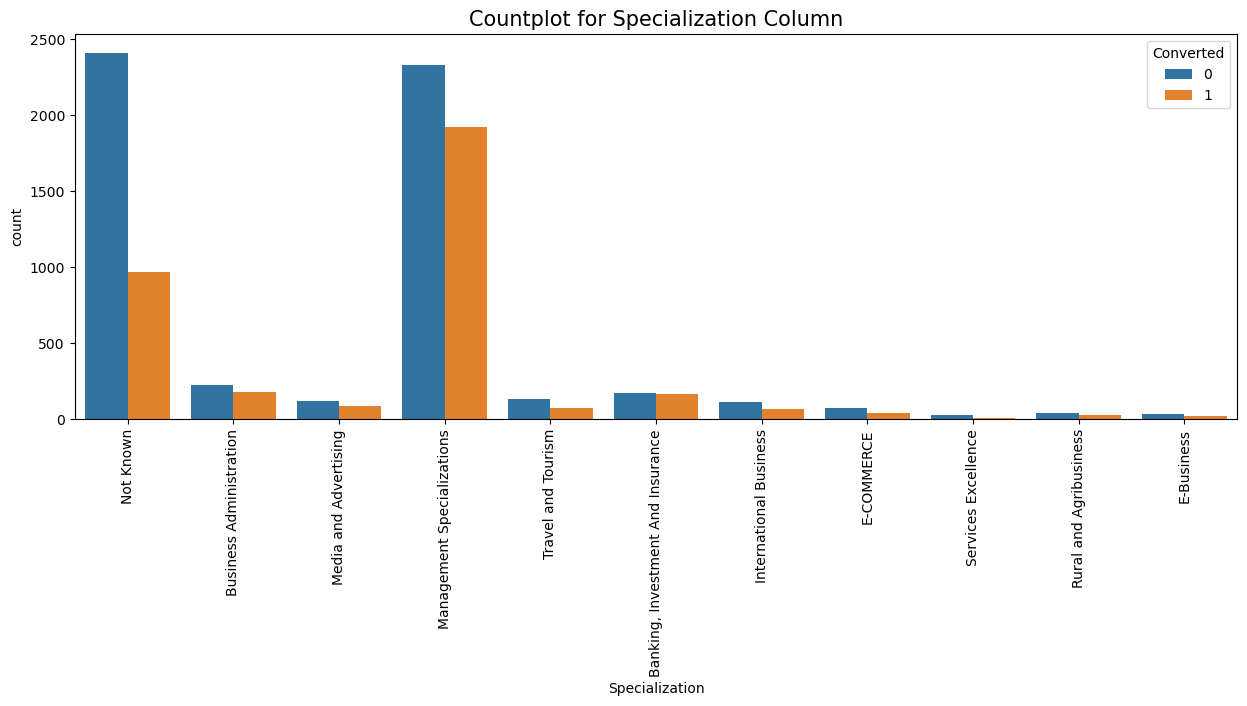

In [27]:
# Plotting specialisation column again after merging management specializations

plt.figure(figsize = [15,5])
plt.title("Countplot for Specialization Column", size = 15)
sns.countplot(x = leads["Specialization"], hue = leads["Converted"])
plt.xticks(rotation = 90);

In [28]:
# Checking value count for "WHat is your current occupation" column

leads["What is your current occupation"].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
# checking mode of the same column

leads["What is your current occupation"].mode()

0    Unemployed
Name: What is your current occupation, dtype: object

In [30]:
# Replacing NaN values with the mode

leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.nan, "Unemployed")

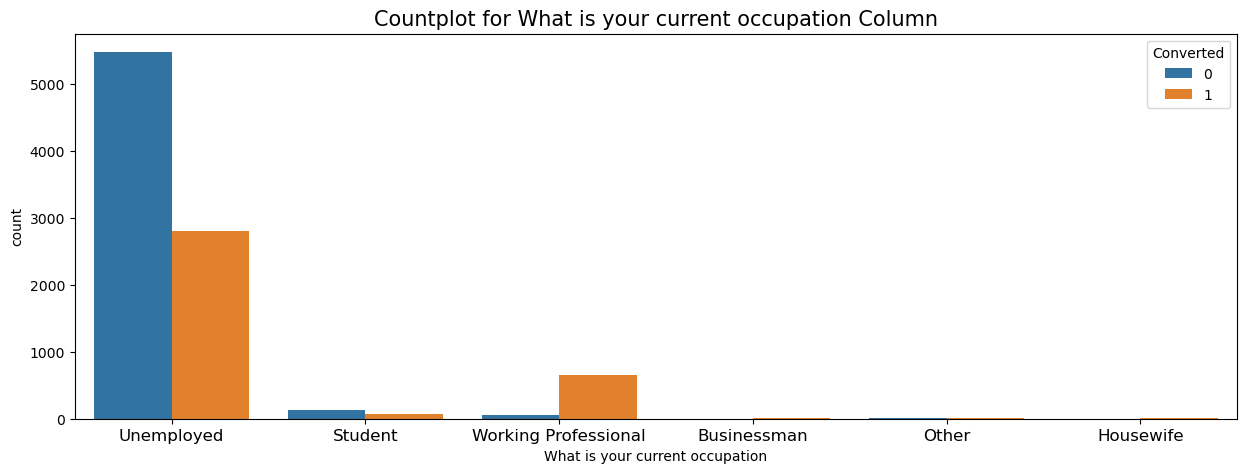

In [31]:
# plotting countplot for "What is your current occupation" column

plt.figure(figsize = [15,5])
plt.title("Countplot for What is your current occupation Column", size = 15)
sns.countplot(x = leads["What is your current occupation"], hue = leads["Converted"])
plt.xticks(size = 12);

#### Working professional have high chances of getting converted.

In [32]:
# Checking value counts for "What matters most to you in choosing a course"

leads["What matters most to you in choosing a course"].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
# Checking mode

leads["What matters most to you in choosing a course"].mode()

0    Better Career Prospects
Name: What matters most to you in choosing a course, dtype: object

In [34]:
# Replacing NaN with the mode

leads["What matters most to you in choosing a course"] = leads["What matters most to you in choosing a course"].replace(np.nan, "Better Career Prospects")

In [35]:
# checking value counts after replacing NaN values with the mode

leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

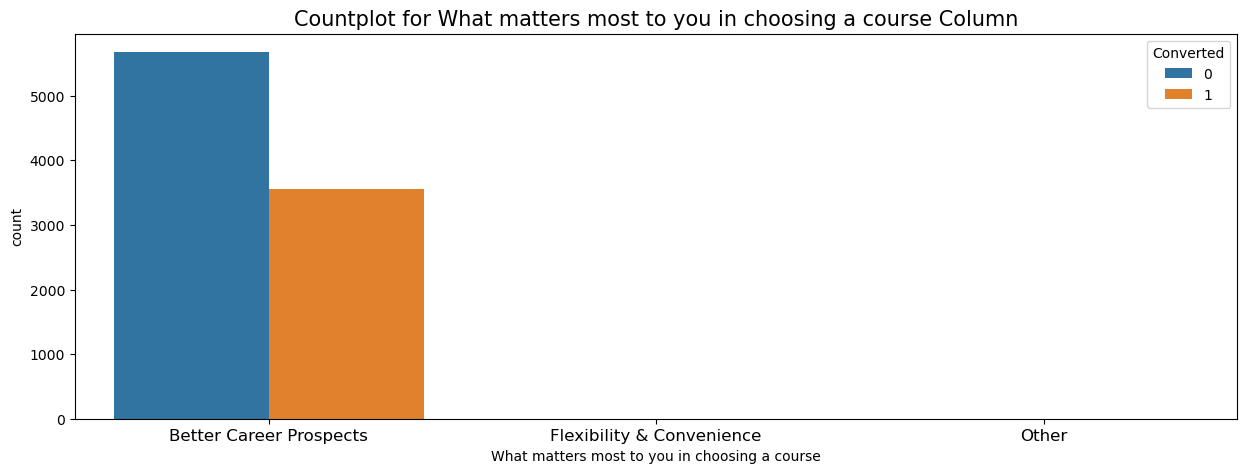

In [36]:
# plotting countplot for "What matters most to you in choosing a course" column

plt.figure(figsize = [15,5])
plt.title("Countplot for What matters most to you in choosing a course Column", size = 15)
sns.countplot(x = leads["What matters most to you in choosing a course"], hue = leads["Converted"])
plt.xticks(size = 12);

In [37]:
# checking value counts for Tags column

leads["Tags"].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [38]:
#replacing NaN values with "Not Specified"

leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [39]:
# checking value Counts 

leads['Tags'].value_counts()

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

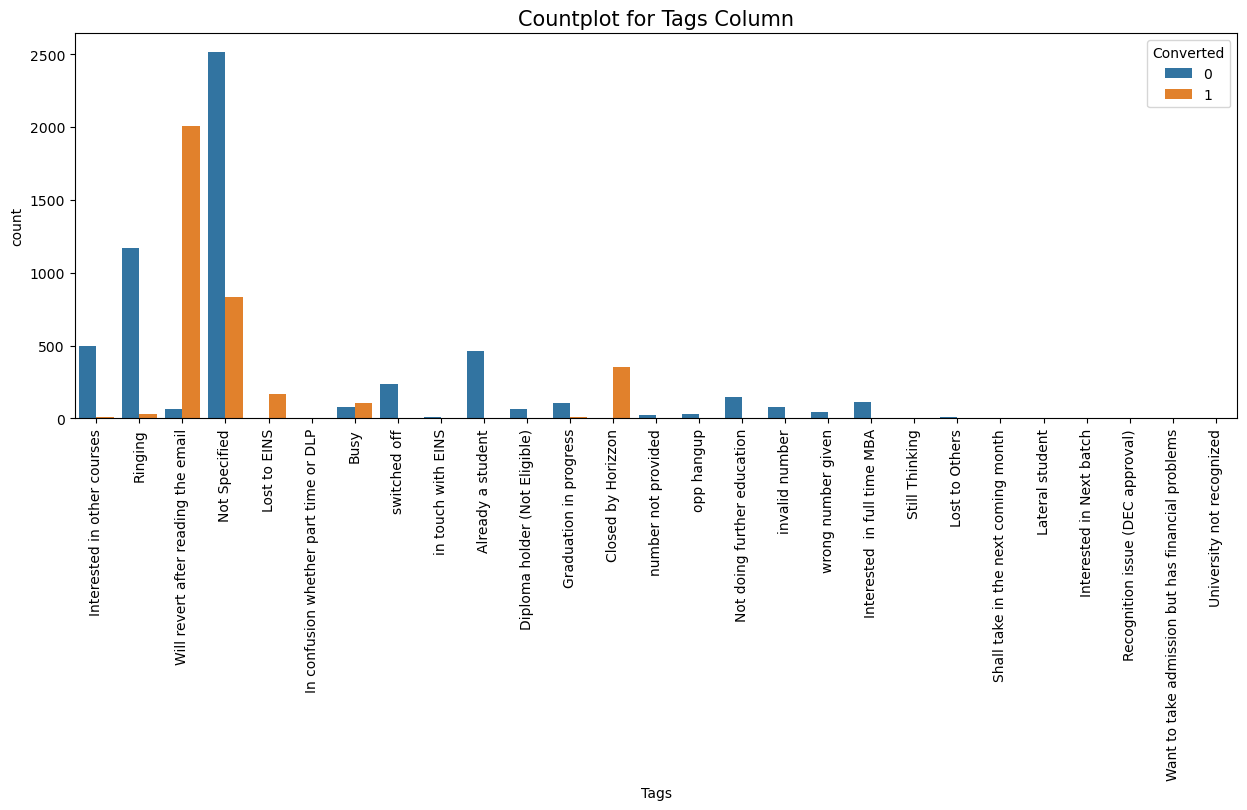

In [40]:
#plotting countplot for Tags Column

plt.figure(figsize=(15,5))
plt.title("Countplot for Tags Column", size = 15)
sns.countplot(x = leads["Tags"], hue=leads["Converted"])
plt.xticks(rotation=90);

In [41]:
# Checking value counts for Lead Source column

leads["Lead Source"].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [42]:
# Replacing leads Score values 

leads["Lead Source"] = leads["Lead Source"].replace(np.nan, "Others")
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads["Lead Source"] = leads["Lead Source"].replace("google", "Google")
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

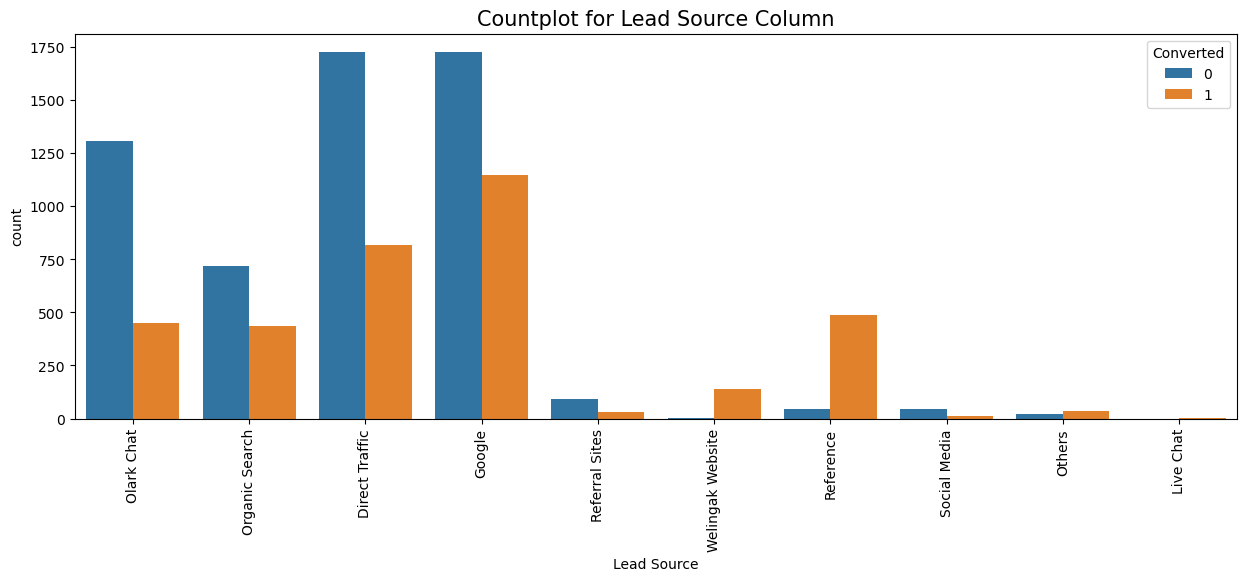

In [43]:
# plotting countplot for Lead Source Column

plt.figure(figsize = [15,5])
plt.title("Countplot for Lead Source Column", size = 15)
sns.countplot(x = leads["Lead Source"], hue = leads["Converted"])
plt.xticks(rotation = 90);

#### 
- Direct Traffic & Google are the two sources which generates the maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.

In [44]:
# checking value counts for Last Activity column

leads["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [45]:
#replacing Nan Values and merging lower frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                                        'Approached upfront', 'View in browser link Clicked',       
                                                        'Email Marked Spam', 'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

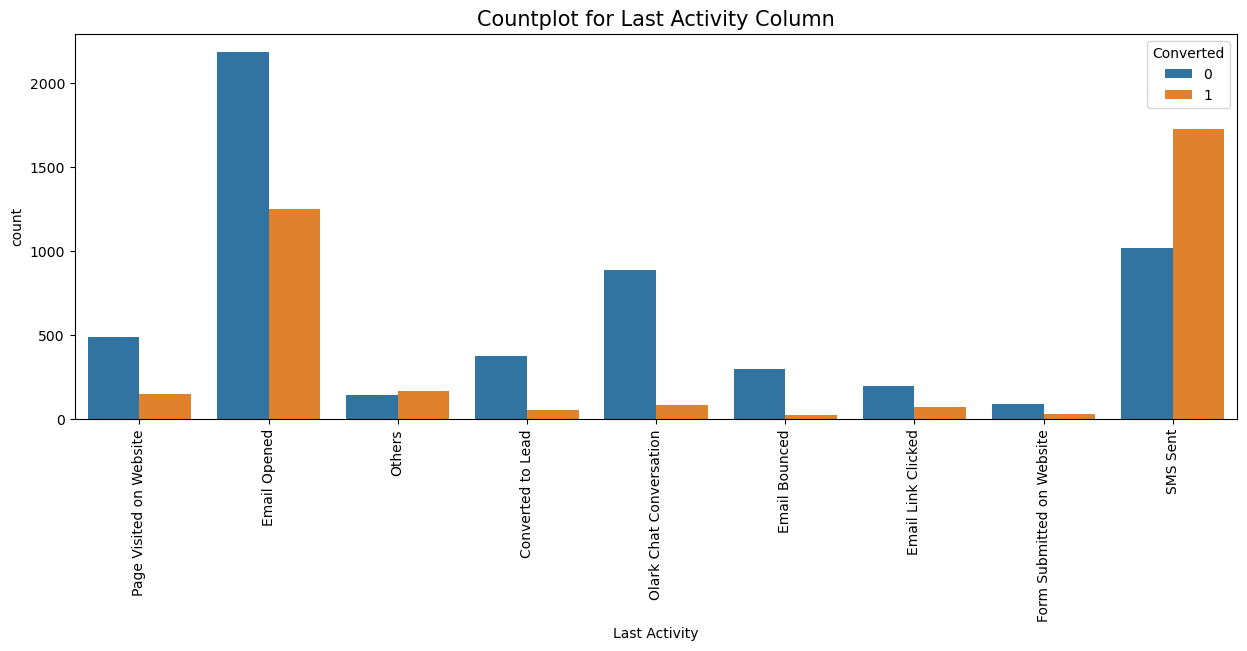

In [46]:
# plotting countplot for Last Activity Column

plt.figure(figsize = [15,5])
plt.title("Countplot for Last Activity Column", size = 15)
sns.countplot(x = leads["Last Activity"], hue = leads["Converted"])
plt.xticks(rotation = 90);

In [47]:
# Checking missing values percentage again

round(leads.isna().mean()*100, 2 )

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [48]:
# removing rows which have NaN values from the dataset.

leads = leads.dropna()

In [49]:
# checking missing value percentage

leads.isna().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [50]:
# checking value counts for last notable activity column

leads["Last Notable Activity"].value_counts()

Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [51]:
# replacing values 

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation', 'Email Marked Spam',
                                                                         'Unreachable', 'Unsubscribed',
                                                                         'Email Bounced', 'Resubscribed to emails',
                                                                         'View in browser link Clicked',
                                                                         'Approached upfront', 'Form Submitted on Website', 
                                                                         'Email Received'],'Other_Notable_activity')

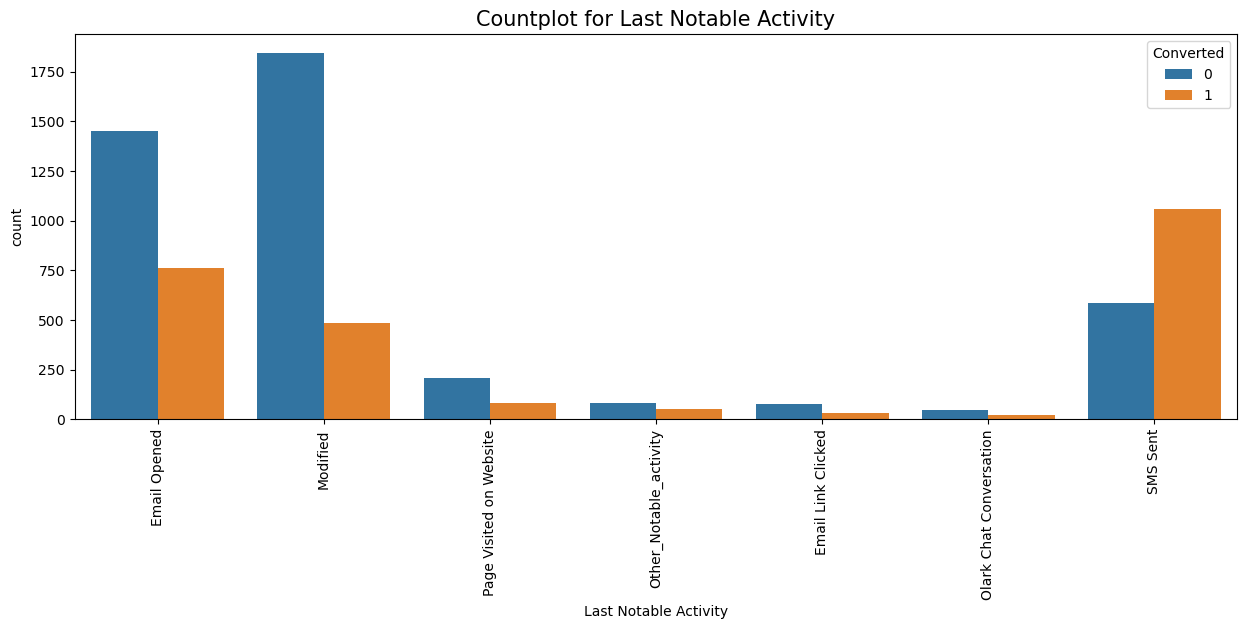

In [52]:
# plotting last notable activity column

plt.figure(figsize = (15,5))
plt.title("Countplot for Last Notable Activity", size = 15)
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
plt.xticks(rotation=90);

In [53]:
# checking value counts for Lead Origin Column

leads["Lead Origin"].value_counts(dropna = False)

Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: Lead Origin, dtype: int64

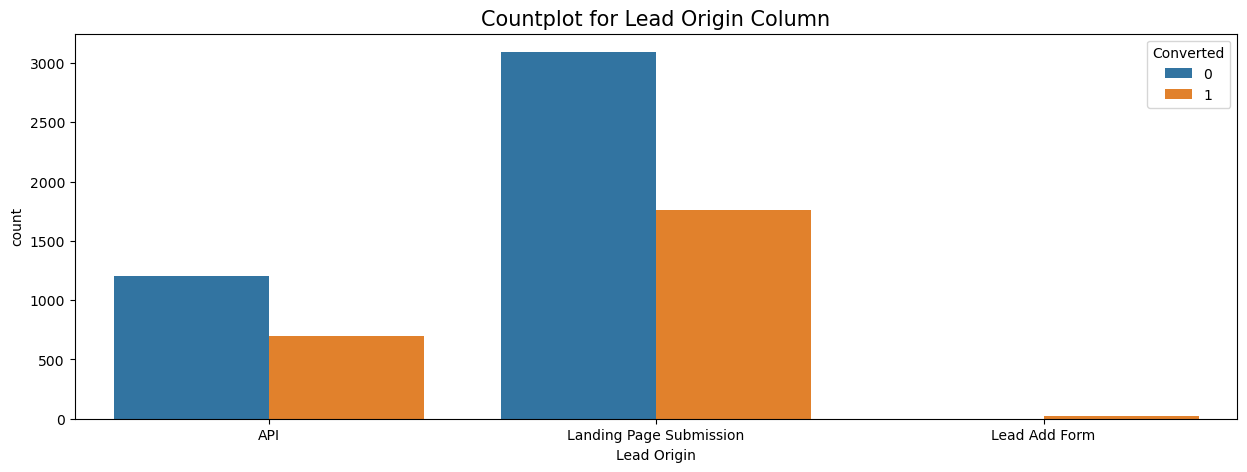

In [54]:
# plotting Lead Origin 

plt.figure(figsize = [15,5])
plt.title("Countplot for Lead Origin Column", size = 15)
sns.countplot(x = leads["Lead Origin"], hue = leads["Converted"]);

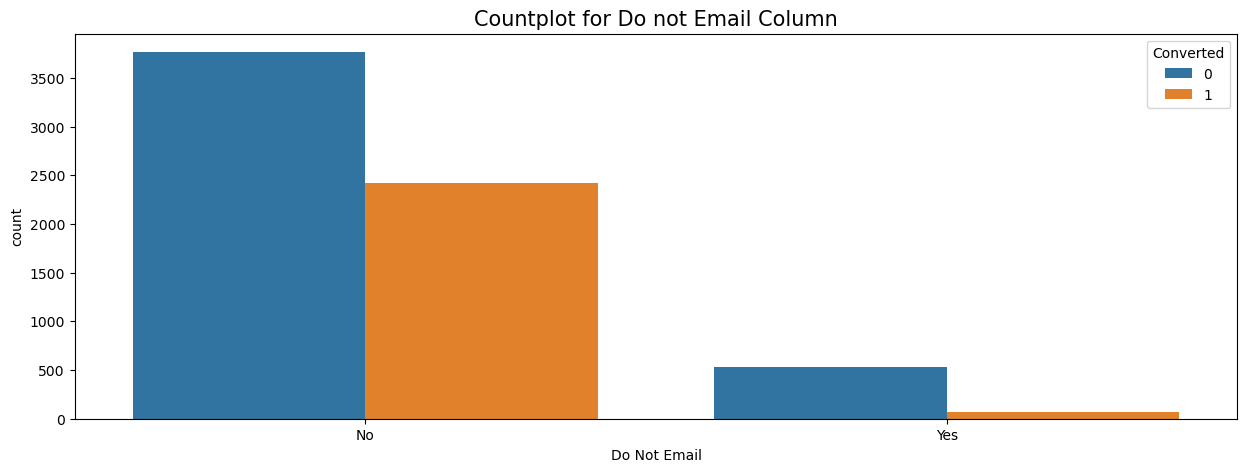

In [55]:
# plotting do not email column

plt.figure(figsize = [15,5])
plt.title("Countplot for Do not Email Column", size = 15)
sns.countplot(x = leads["Do Not Email"], hue = leads["Converted"]);

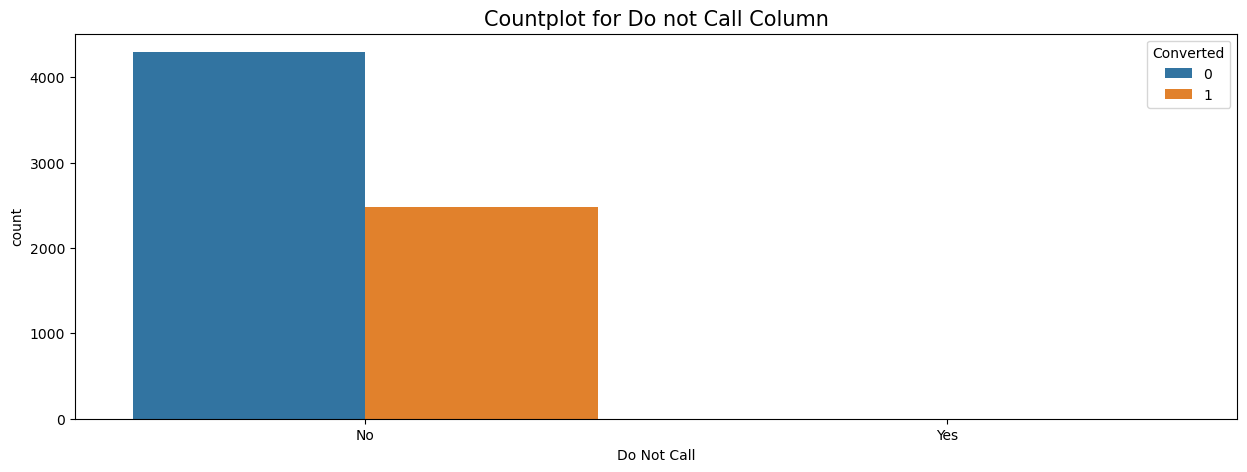

In [56]:
# plotting do not call column

plt.figure(figsize = [15,5])
plt.title("Countplot for Do not Call Column", size = 15)
sns.countplot(x = leads["Do Not Call"], hue = leads["Converted"]);

In [57]:
# checking value counts for DO Not Call Column

leads["Do Not Call"].value_counts()

No     6778
Yes       1
Name: Do Not Call, dtype: int64

####

- I'm deleting "Do Not Call" Column as it has only 1 value of yes

In [58]:
# checking total percentage of leads converted 

leads["Converted"].mean()*100

36.65732408909869

In [59]:
# dropping columns

leads.drop(columns_to_drop, axis = 1, inplace = True)

In [60]:
# checking shape of the dataframe after dropping the columns

leads.shape

(6779, 14)

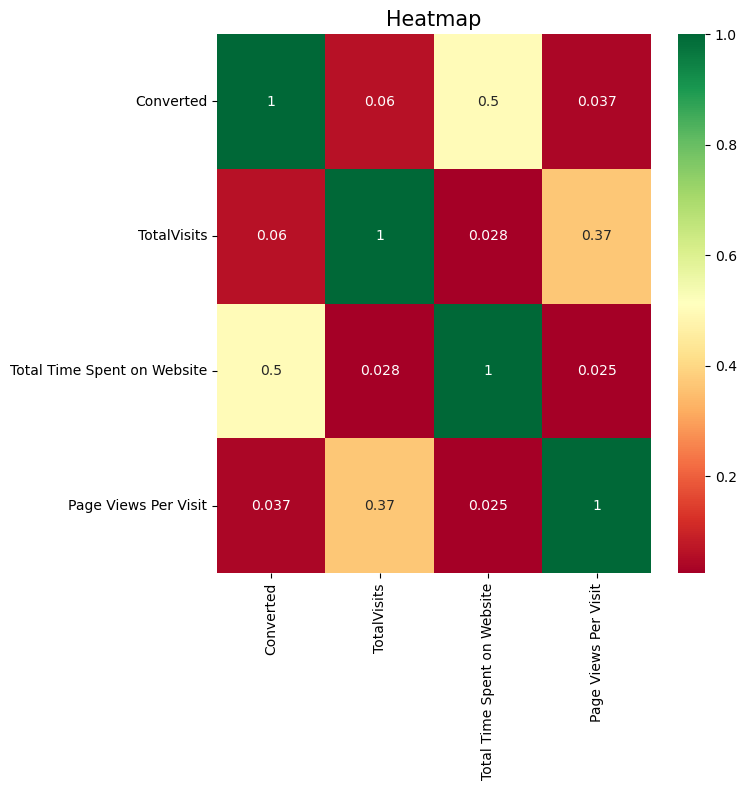

In [61]:
# heatmap for correlation

plt.figure(figsize = (7,7))
plt.title("Heatmap", size = 15)
sns.heatmap(leads.corr(), annot = True, cmap = "RdYlGn");

### Boxplots & Outlier Treatment
---

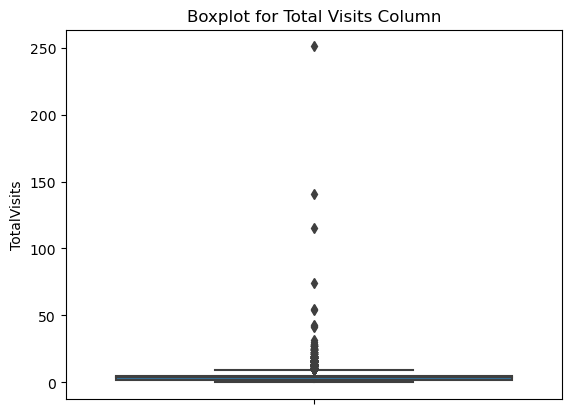

In [62]:
# plotting boxplot to visualize Total visits column

plt.title("Boxplot for Total Visits Column")
sns.boxplot(y = leads["TotalVisits"]);

In [63]:
# checking percentile values

leads["TotalVisits"].describe(percentiles = [.25, .5, .75, .9, .95, .99])

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64

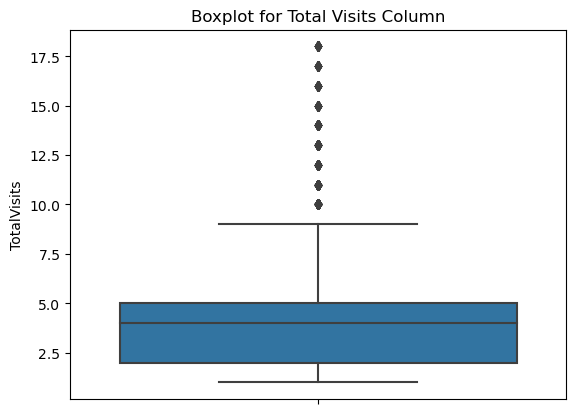

In [64]:
# Removing outlier values from the column

Q3 = leads["TotalVisits"].quantile(0.99)
leads = leads[leads["TotalVisits"] <= Q3]

Q1 = leads["TotalVisits"].quantile(0.01)
leads = leads[leads["TotalVisits"] >= Q1]

plt.title("Boxplot for Total Visits Column")
sns.boxplot(y = leads["TotalVisits"]);

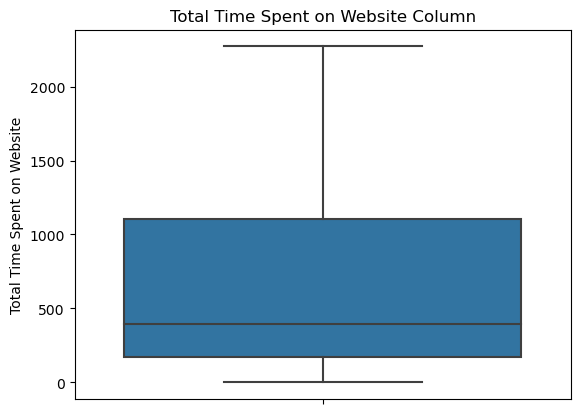

In [65]:
# creating boxplot 

plt.title("Total Time Spent on Website Column")
sns.boxplot(y = leads["Total Time Spent on Website"]);

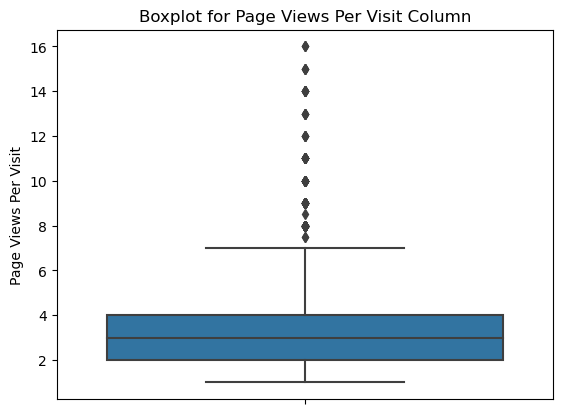

In [66]:
# Boxplot creation

plt.title("Boxplot for Page Views Per Visit Column")
sns.boxplot(y = leads["Page Views Per Visit"]);

In [67]:
# checking percentiles

leads["Page Views Per Visit"].describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    6706.000000
mean        3.104545
std         1.817244
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
90%         5.000000
95%         6.500000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

- As there is no major outliers so I'm keep this column as it is 

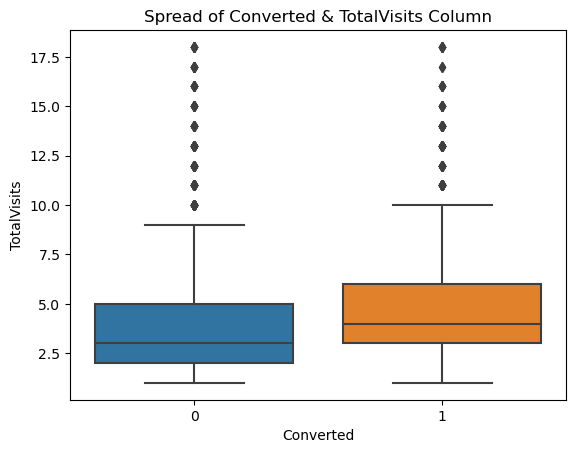

In [68]:
# checking spread 

plt.title("Spread of Converted & TotalVisits Column")

sns.boxplot(x = leads["Converted"], y = leads["TotalVisits"]);

- Median of connverted (1) leads is higher than the median of not converted(0)

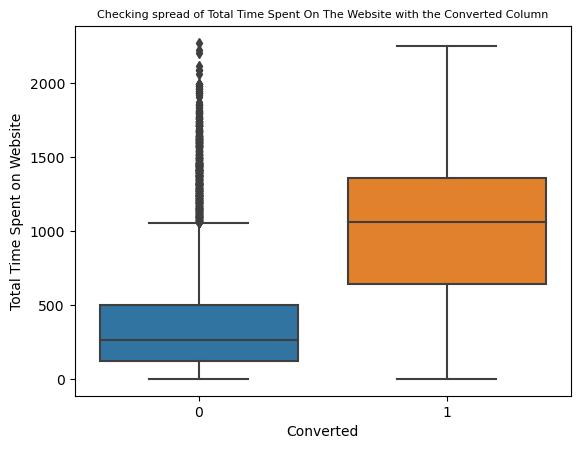

In [69]:
# checking spread

plt.title("Checking spread of Total Time Spent On The Website with the Converted Column", size = 8)
sns.boxplot(x = leads["Converted"], y = leads["Total Time Spent on Website"]);

- Converted leads spent more time on Website than non converted one.
- Median of Converted leads are much higher.

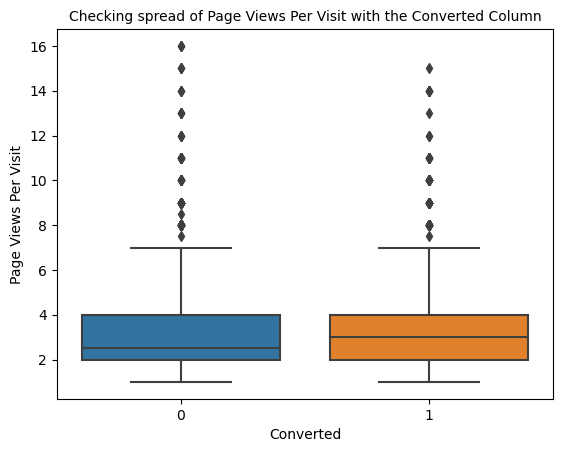

In [70]:
# checking spread

plt.title("Checking spread of Page Views Per Visit with the Converted Column", size = 10)
sns.boxplot(x = leads["Converted"], y = leads["Page Views Per Visit"]);

- Median of both converted and not converted leads have no major difference.

### Dummy Variables 
------

In [71]:
# fetching columns of dataset

leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [72]:
# creating new variable for categorical columns

categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 
     'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']

In [73]:
# creation of dummy variables

varlist = ["Do Not Email", "A free copy of Mastering The Interview"]

def dummy_var(x):
    return x.map({"Yes": 1, "No": 0})

leads[varlist] = leads[varlist].apply(dummy_var)

In [74]:
# Creating Dummy Variable

dummy = pd.get_dummies(leads[["Lead Origin", "City", "What is your current occupation"]], drop_first = True)

leads = pd.concat([leads, dummy], 1)

In [75]:
# creation of dummy variable

dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy.drop("Specialization_Not Known", axis = 1, inplace = True)

leads = pd.concat([leads, dummy], axis = 1)

In [76]:
# creation of dummy variable

dummy = pd.get_dummies(leads["Last Activity"], prefix = "Last Activity")
dummy.drop("Last Activity_Others", axis = 1, inplace = True)
leads = pd.concat([leads, dummy], axis = 1)

In [77]:
# creation of dummy variables

dummy = pd.get_dummies(leads["Lead Source"], prefix = "Lead Source")
dummy.drop("Lead Source_Others", axis = 1, inplace = True)
leads = pd.concat([leads, dummy], axis = 1)

In [78]:
# creation of dummy variables

dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [79]:
# creation of dummy variables

dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [80]:
#dropping original columns after dummy variable creation

leads.drop(categorical_columns, axis = 1, inplace = True)

In [81]:
# checking head of dataset

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Model Building Using Logistic Regression
-------

In [82]:
# Importing Necessary Libraries for Model Building

from sklearn.model_selection import train_test_split   # To split the data into train_test_split
from sklearn.preprocessing import StandardScaler       # To scale the data 
import statsmodels.api as sm                           # To use statsmodels
from sklearn.feature_selection import RFE              # To use RFE
from sklearn.linear_model import LogisticRegression    # To use Logistic Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor      # For VIF
from sklearn import metrics                            # for confusion metrics
from sklearn.metrics import precision_score, recall_score   # for precision_score, recall_score
from sklearn.metrics import precision_recall_curve     # for precision_recall_curve 

In [83]:
# dropping Target column and assigning target column to the y variable.

X=leads.drop('Converted', axis=1)
y = leads['Converted']

In [84]:
# Splitting data 

X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.7, random_state = 100)

In [85]:
# assigning numercial columns into num_col

num_col = X_train.select_dtypes(include = ["float64", "int64"]).columns

In [86]:
# Filtering numerical columns

X_train[num_col]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
8957,2.0,183,2.00
2826,7.0,1273,7.00
8498,3.0,178,3.00
2170,9.0,41,2.25
4169,3.0,34,1.50
...,...,...,...
8358,3.0,342,3.00
98,5.0,1110,5.00
5326,10.0,97,3.33
8244,3.0,130,3.00


In [87]:
# Scaling

scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [88]:
# checking head of X_train

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,...,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
8957,-0.811422,-0.839539,-0.605248,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2826,0.959297,1.165081,2.164795,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8498,-0.457279,-0.848735,-0.051239,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2170,1.667584,-1.100692,-0.466746,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4169,-0.457279,-1.113566,-0.882252,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Recursive Feature Elimination (RFE)
------

In [89]:
# Using Logisctic Regression and RFE for 15 variables

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [90]:
# checking which variable has been selected by the RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('City_Other Cities', False, 50),
 ('City_Other Cities of Maharashtra', False, 46),
 ('City_Other Metro Cities', False, 55),
 ('City_Thane & Outskirts', False, 57),
 ('City_Tier II Cities', False, 58),
 ('What is your current occupation_Housewife', False, 44),
 ('What is your current occupation_Other', False, 25),
 ('What is your current occupation_Student', False, 15),
 ('What is your current occupation_Unemployed', False, 16),
 ('What is your current occupation_Working Professional', False, 4),
 ('Specialization_Banking, Investment And Insurance', False, 29),
 ('Specialization_Business Administration', False, 35),
 ('Specialization_E-Business', False, 56),
 ('Specialization_E-COMMERCE', False, 26),
 ('Specialization_International Business', False, 38),
 ('Specialization_Management 

In [91]:
# creating new variable "col" and assigning RFE columns in it

col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_Email Bounced',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

In [92]:
# Features that are not choosen by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Last Activity

## Model Building
-------

In [93]:
# building model 1 

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4694
Model:                            GLM   Df Residuals:                     4678
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1097.8
Date:                Tue, 19 Dec 2023   Deviance:                       2195.7
Time:                        01:24:22   Pearson chi2:                 6.56e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5738
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6182      0.072    -22.423      0.000      -1.760      -1.477
Lead Origin_Lead Add Form                   24.9398   4.03e+04      0.001      1.000    -7.9e+04     7.9e+04
Last Activity_Email Bounced                 -1.9544      0.520     -3.761      0.000      -2.973      -0.936
Last Notable Activity_SMS Sent               2.5090      0.134     18.670      0.000       2.246       2.772
Tags_Already a student                      -3.7675      1.005     -3.749      0.000      -5.737      -1.798
Tags_Closed by Horizzon                      6.3848      1.011      6.317      0.000       4.404       8.366
Tags_Interested  in full time MBA           -2.4973      1.011     -2.471      0.013      -4.478      -0.516
Tags_Interested in other courses            -2.3300      0.424     -5.493      0.000      -3.161      -1.499
Tags_Lost to EINS                            5.1348      0.593      8.658      0.000       3.972       6.297
Tags_Not doing further education           -23.8411   2.13e+04     -0.001      0.999   -4.18e+04    4.18e+04
Tags_Ringing                                -3.4303      0.257    -13.373      0.000      -3.933      -2.928
Tags_Will revert after reading the email     4.5765      0.194     23.538      0.000       4.195       4.958
Tags_invalid number                         -3.9166      1.026     -3.816      0.000      -5.928      -1.905
Tags_opp hangup                             -2.8796      1.060     -2.715      0.007      -4.958      -0.801
Tags_switched off                           -3.9641      0.598     -6.627      0.000      -5.136      -2.792
Tags_wrong number given                    -25.0810   3.58e+04     -0.001      0.999   -7.01e+04    7.01e+04
============================================================================================================
"""

- Dropping "Lead Origin_Lead Add Form" variable as it's p-value is high (1)

In [94]:
# dropping "Lead Origin_Lead Add Form" from col

col = col.drop("Lead Origin_Lead Add Form", 1)

In [95]:
# Building model 2

X_train_sm = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4694
Model:                            GLM   Df Residuals:                     4679
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1103.4
Date:                Tue, 19 Dec 2023   Deviance:                       2206.9
Time:                        01:24:23   Pearson chi2:                 6.68e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5728
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6052      0.072    -22.362      0.000      -1.746      -1.465
Last Activity_Email Bounced                 -1.9669      0.520     -3.785      0.000      -2.986      -0.948
Last Notable Activity_SMS Sent               2.4970      0.134     18.608      0.000       2.234       2.760
Tags_Already a student                      -3.7803      1.005     -3.762      0.000      -5.750      -1.811
Tags_Closed by Horizzon                      6.4707      1.010      6.408      0.000       4.492       8.450
Tags_Interested  in full time MBA           -2.5103      1.011     -2.484      0.013      -4.491      -0.530
Tags_Interested in other courses            -2.3410      0.424     -5.521      0.000      -3.172      -1.510
Tags_Lost to EINS                            5.1224      0.593      8.637      0.000       3.960       6.285
Tags_Not doing further education           -23.8504   2.13e+04     -0.001      0.999   -4.18e+04    4.18e+04
Tags_Ringing                                -3.4334      0.256    -13.390      0.000      -3.936      -2.931
Tags_Will revert after reading the email     4.5681      0.194     23.512      0.000       4.187       4.949
Tags_invalid number                         -3.9190      1.026     -3.818      0.000      -5.931      -1.907
Tags_opp hangup                             -2.8826      1.060     -2.719      0.007      -4.961      -0.805
Tags_switched off                           -3.9665      0.598     -6.632      0.000      -5.139      -2.794
Tags_wrong number given                    -25.0843   3.58e+04     -0.001      0.999   -7.02e+04    7.01e+04
============================================================================================================
"""

- The p-value of "Tags_Not doing further education" is high so I'm dropping this column

In [96]:
# dropping "Tags_Not doing further education" column

col = col.drop("Tags_Not doing further education", 1)

In [97]:
# Model Building 3

X_train_sm = sm.add_constant(X_train_sm[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4694
Model:                            GLM   Df Residuals:                     4680
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1118.0
Date:                Tue, 19 Dec 2023   Deviance:                       2235.9
Time:                        01:24:23   Pearson chi2:                 6.89e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5701
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6604      0.071    -23.231      0.000      -1.801      -1.520
Last Activity_Email Bounced                 -2.0971      0.504     -4.162      0.000      -3.085      -1.109
Last Notable Activity_SMS Sent               2.5287      0.133     18.945      0.000       2.267       2.790
Tags_Already a student                      -3.7233      1.005     -3.706      0.000      -5.693      -1.754
Tags_Closed by Horizzon                      6.5397      1.010      6.472      0.000       4.559       8.520
Tags_Interested  in full time MBA           -2.4545      1.011     -2.429      0.015      -4.435      -0.474
Tags_Interested in other courses            -2.2905      0.424     -5.399      0.000      -3.122      -1.459
Tags_Lost to EINS                            5.1845      0.594      8.733      0.000       4.021       6.348
Tags_Ringing                                -3.4044      0.256    -13.278      0.000      -3.907      -2.902
Tags_Will revert after reading the email     4.6256      0.194     23.792      0.000       4.245       5.007
Tags_invalid number                         -3.8911      1.026     -3.791      0.000      -5.903      -1.879
Tags_opp hangup                             -2.8532      1.061     -2.690      0.007      -4.932      -0.774
Tags_switched off                           -3.9391      0.598     -6.586      0.000      -5.111      -2.767
Tags_wrong number given                    -23.0416   1.31e+04     -0.002      0.999   -2.56e+04    2.56e+04
============================================================================================================
"""

- The p-value of "Tags_wrong number given" column is high. So, I'm dropping this column

In [98]:
# Dropping "Tags_wrong number given" column

col = col.drop("Tags_wrong number given", 1)

In [99]:
# Model Building 4

X_train_sm = sm.add_constant(X_train_sm[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4694
Model:                            GLM   Df Residuals:                     4681
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1130.1
Date:                Tue, 19 Dec 2023   Deviance:                       2260.1
Time:                        01:24:23   Pearson chi2:                 6.72e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5679
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6741      0.071    -23.440      0.000      -1.814      -1.534
Last Activity_Email Bounced                 -2.1228      0.501     -4.234      0.000      -3.105      -1.140
Last Notable Activity_SMS Sent               2.4683      0.131     18.852      0.000       2.212       2.725
Tags_Already a student                      -3.7093      1.005     -3.692      0.000      -5.679      -1.740
Tags_Closed by Horizzon                      6.5563      1.011      6.487      0.000       4.575       8.537
Tags_Interested  in full time MBA           -2.4407      1.011     -2.415      0.016      -4.421      -0.460
Tags_Interested in other courses            -2.2669      0.424     -5.351      0.000      -3.097      -1.436
Tags_Lost to EINS                            5.1995      0.594      8.757      0.000       4.036       6.363
Tags_Ringing                                -3.3407      0.255    -13.099      0.000      -3.841      -2.841
Tags_Will revert after reading the email     4.6443      0.194     23.899      0.000       4.263       5.025
Tags_invalid number                         -3.8246      1.026     -3.728      0.000      -5.835      -1.814
Tags_opp hangup                             -2.7896      1.060     -2.633      0.008      -4.866      -0.713
Tags_switched off                           -3.8723      0.597     -6.482      0.000      -5.043      -2.701
============================================================================================================
"""

## Variance Inflation Factor (VIF)
----

In [100]:
# Checking VIF 

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_switched off,1.03
0,Last Activity_Email Bounced,1.02
2,Tags_Already a student,1.01
9,Tags_invalid number,1.01
3,Tags_Closed by Horizzon,1.00
4,Tags_Interested in full time MBA,1.00
6,Tags_Lost to EINS,1.00
10,Tags_opp hangup,1.00
7,Tags_Ringing,0.30
1,Last Notable Activity_SMS Sent,0.14


- VIF less than 5 is accepted and is not a matter of concern. So, in this all the values lies less than 5.

In [101]:
# Predicted Values

y_train_pred = res.predict(X_train_sm)

In [102]:
# reshaping the values

y_train_pred = y_train_pred.values.reshape(-1)

In [103]:
# creating dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.688728,8957
1,1,0.688728,2826
2,0,0.021947,8498
3,0,0.157874,2170
4,0,0.157874,4169


In [104]:
# creating predicted variable and assigning the values in it

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [105]:
# checking head of y_train_pred_final

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.688728,8957,1
1,1,0.688728,2826,1
2,0,0.021947,8498,0
3,0,0.157874,2170,0
4,0,0.157874,4169,0


In [106]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2807  138]
 [ 257 1492]]


In [107]:
# Checking the accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9158500213037921


In [108]:
# creating TP, TN, FP, FN

TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1]  
FN = confusion[1,0] 

In [109]:
# sesnitivty of the model

TP / float(TP+FN)

0.8530588907947398

In [110]:
# specificity

TN / float(TN+FP)

0.9531409168081494

In [111]:
# Calculating False Postive Rate (False Conversions)

print(FP/ float(TN+FP))

0.046859083191850594


In [112]:
# positive predictive value

print (TP / float(TP+FP))

0.9153374233128835


In [113]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9161227154046997


### ROC Curve
------

In [114]:
# ROC Curve

def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
# assigning values

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

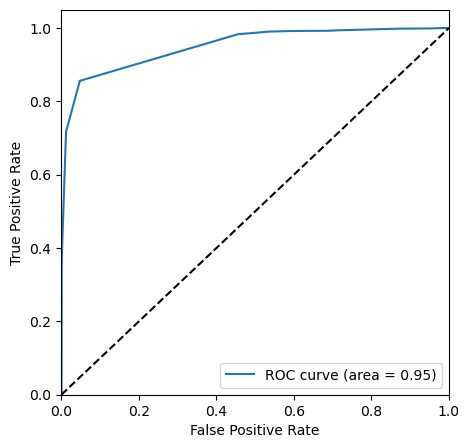

In [116]:
# plotting ROC Curve

roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- We're getting ROC of 0.95 which is good.

In [117]:
# different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.688728,8957,1,1,1,1,1,1,1,1,0,0,0
1,1,0.688728,2826,1,1,1,1,1,1,1,1,0,0,0
2,0,0.021947,8498,0,1,0,0,0,0,0,0,0,0,0
3,0,0.157874,2170,0,1,1,0,0,0,0,0,0,0,0
4,0,0.157874,4169,0,1,1,0,0,0,0,0,0,0,0


In [118]:
# Calculating accuracy, sensitivity, specificity at various cutoffs.

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensi, speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.372603     1.000000     0.000000
0.1          0.1  0.706008     0.983419     0.541256
0.2          0.2  0.915850     0.853059     0.953141
0.3          0.3  0.915850     0.853059     0.953141
0.4          0.4  0.915850     0.853059     0.953141
0.5          0.5  0.915850     0.853059     0.953141
0.6          0.6  0.915850     0.853059     0.953141
0.7          0.7  0.887303     0.718125     0.987776
0.8          0.8  0.886664     0.715838     0.988115
0.9          0.9  0.886451     0.715266     0.988115


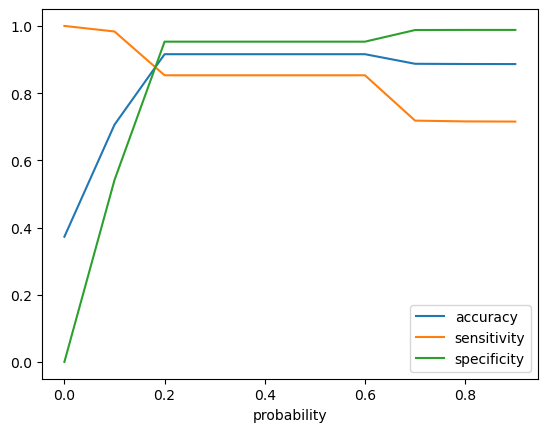

In [119]:
# Plotting accuracy, sensitivity, specificity

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity']);

In [120]:
# 0.2 is the point for cutoff

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

In [121]:
# creating new column "Lead_score"

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.688728,8957,1,69
1,1,0.688728,2826,1,69
2,0,0.021947,8498,0,2
3,0,0.157874,2170,0,16
4,0,0.157874,4169,0,16


In [122]:
# checking accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9158500213037921

In [123]:
# confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2807,  138],
       [ 257, 1492]], dtype=int64)

In [124]:
# assigning TP, TN, FP, FN

TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [125]:
# checking sensitivity

TP / float(TP+FN)

0.8530588907947398

In [126]:
# checking specificity

TN / float(TN+FP)

0.9531409168081494

Observation:

- The ROC curve has a value of 0.95, which is very good. 

We have the following values for the Train Data:

- Accuracy : 91.58 %

- Sensitivity : 85.30 %

- Specificity : 95.31 %

In [127]:
# Calculate False Postive Rate

print(FP/ float(TN+FP))

0.046859083191850594


In [128]:
# Positive predictive value 

print (TP / float(TP+FP))

0.9153374233128835


In [129]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9161227154046997


In [130]:
# confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2807,  138],
       [ 257, 1492]], dtype=int64)

In [131]:
# Precision

TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9153374233128835

In [132]:
# Recall

TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8530588907947398

In [133]:
# checking precision score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9153374233128835

In [134]:
# checking recall score

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8530588907947398

In [135]:
# assigning precision recall curve values to the variables for plotting

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

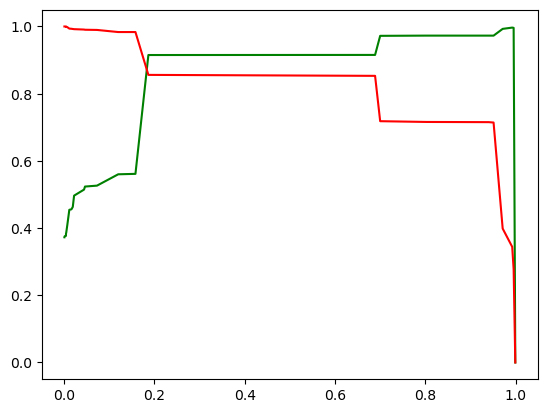

In [136]:
# plotting precision recall curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-");

In [137]:
#scaling test dataset

num_cols = X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [138]:
# checking head of test dataset

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,...,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
5643,-1.196339,-1.031859,-1.156119,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4120,-0.461479,-0.752291,-0.071922,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
716,-0.828909,-0.828706,-0.614020,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,-0.461479,0.194512,-0.071922,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4174,-0.461479,0.194512,-0.885069,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [139]:
# assigning columns selected by the RFE into the X_test

X_test = X_test[col]

In [140]:
# adding constant 

X_test_sm = sm.add_constant(X_test)

In [141]:
# prediction on test dataset

y_test_pred = res.predict(X_test_sm)

In [142]:
# creating DataFrame

y_pred_1 = pd.DataFrame(y_test_pred)

In [143]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [144]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [145]:
# Removing index of both dataframe

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Concatinating y_test_df & y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [147]:
# Column Rename

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [148]:
# Columns Arrangement

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [149]:
# Adding New column "Final Predicted"

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [150]:
# accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9165009940357853

In [151]:
# Confusion Metrics

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1236,   74],
       [  94,  608]], dtype=int64)

In [152]:
# creating TP, TN, FP, FN

TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [153]:
# Sensitivity

TP / float(TP+FN)

0.8660968660968661

In [154]:
# specificity

TN / float(TN+FP)

0.9435114503816794

In [155]:
# Precision Score

precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8914956011730205

In [156]:
# Recall Score

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8660968660968661

#### Observation:
-----

- Data Obtained after Test Data :

Accuracy : 91.65 %

Sensitivity : 86.61 %

Specificity : 94.35 %

- Data obtained after Train Data:

Accuracy : 91.58 %

Sensitivity : 85.30 %

Specificity : 95.31 %


- The model predicts the Conversion Rate very well.